# Języki Programowania Python i R


## dr inż. Patryk Jasik
### Division of Theoretical Physics and Quantum Information
### Institute of Physics and Computer Science
### Faculty of Applied Physics and Mathematics
### Gdansk University of Technology

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
wine = pd.read_csv("data/winequality-all.csv", comment="#")

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red


In [6]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         5320 non-null   float64 
 1   volatile.acidity      5320 non-null   float64 
 2   citric.acid           5320 non-null   float64 
 3   residual.sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free.sulfur.dioxide   5320 non-null   float64 
 6   total.sulfur.dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  response              5320 non-null   int64   
 12  color                 5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.2 KB


In [4]:
wine.color = wine.color.astype("category")

In [9]:
#do celów analizy będziemy działać na wystandaryzowanym losowym podzbiorze zbioru winequality
np.random.seed(123)
wine_sample = wine.sample(n=1000, random_state=123)
X = wine_sample.iloc[:, :11]
X[0:10] #próbka

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
4914,6.2,0.21,0.52,6.5,0.047,28.0,123.0,0.99418,3.22,0.49,9.9
3480,7.6,0.23,0.64,12.9,0.033,54.0,170.0,0.99800,3.00,0.53,8.8
4588,6.7,0.28,0.34,8.9,0.048,32.0,111.0,0.99455,3.25,0.54,11.0
925,7.9,0.19,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.2
4701,6.8,0.28,0.29,11.9,0.052,51.0,149.0,0.99544,3.02,0.58,10.4
2144,6.1,0.27,0.44,6.7,0.041,61.0,230.0,0.99505,3.12,0.40,8.9
1436,6.1,0.27,0.43,7.5,0.049,65.0,243.0,0.99570,3.12,0.47,9.0
2436,6.2,0.22,0.27,1.5,0.064,20.0,132.0,0.99380,3.22,0.46,9.2
4457,6.8,0.41,0.30,8.8,0.045,28.0,131.0,0.99530,3.12,0.59,9.9
1945,7.5,0.31,0.51,14.8,0.039,62.0,204.0,0.99820,3.06,0.60,9.5


In [10]:
#standaryzacja
X = (X - X.mean())/X.std()
X[0:10]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
4914,-0.799041,-0.786967,1.249415,0.351068,-0.245932,-0.129954,0.137933,-0.122321,0.076348,-0.278833,-0.528566
3480,0.218383,-0.666141,2.051908,1.826093,-0.602613,1.317687,0.970347,1.160359,-1.336314,-0.015410,-1.463897
4588,-0.435675,-0.364077,0.045675,0.904202,-0.220454,0.092760,-0.074598,0.001917,0.268984,0.050445,0.406764
925,0.436402,-0.907792,0.580671,-0.778249,0.008841,-0.686738,-1.509185,-0.182762,0.525831,1.038280,0.576824
4701,-0.363002,-0.364077,-0.288697,1.595621,-0.118546,1.150651,0.598417,0.300762,-1.207890,0.313868,-0.103416
2144,-0.871714,-0.424490,0.714420,0.397162,-0.398795,1.707436,2.033003,0.169807,-0.565771,-0.871534,-1.378867
1436,-0.871714,-0.424490,0.647545,0.581540,-0.194977,1.930150,2.263246,0.388064,-0.565771,-0.410544,-1.293837
2436,-0.799041,-0.726554,-0.422446,-0.801296,0.187181,-0.575381,0.297331,-0.249918,0.076348,-0.476400,-1.123777
4457,-0.363002,0.421288,-0.221822,0.881155,-0.296886,-0.129954,0.279620,0.253752,-0.565771,0.379724,-0.528566
1945,0.145710,-0.182839,1.182541,2.263992,-0.449749,1.763115,1.572519,1.227515,-0.951043,0.445579,-0.868686


In [11]:
X.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-7.638334e-17,1.012523e-16,-1.296740e-16,1.065814e-17,-2.202682e-16,1.421085e-17,-5.773160e-17,7.087664e-16,2.789768e-15,5.240253e-16,6.714629e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.816465e+00,-1.572333e+00,-2.228055e+00,-9.856744e-01,-1.214066e+00,-1.521915e+00,-1.934247e+00,-2.398910e+00,-2.620553e+00,-1.991080e+00,-1.804017e+00
25%,-6.536948e-01,-6.661413e-01,-5.060388e-01,-7.552016e-01,-5.007038e-01,-7.424168e-01,-6.767705e-01,-8.543219e-01,-6.941951e-01,-6.739668e-01,-8.686865e-01
50%,-2.176560e-01,-2.432520e-01,-8.807363e-02,-5.247289e-01,-2.586702e-01,-1.299536e-01,4.937810e-02,1.870631e-02,-5.207587e-02,-1.471215e-01,-1.034163e-01
75%,3.637290e-01,3.608756e-01,4.469218e-01,5.584931e-01,2.190277e-01,5.938666e-01,6.515501e-01,7.616197e-01,5.900433e-01,4.620433e-01,6.618538e-01
max,6.032233e+00,5.979262e+00,5.997500e+00,3.347214e+00,9.308026e+00,5.437894e+00,4.450547e+00,2.906415e+00,5.149090e+00,7.162857e+00,2.617544e+00


In [12]:
import sklearn.cluster

In [13]:
km = sklearn.cluster.KMeans(n_clusters=2, random_state=123)
km.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

In [14]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
km.cluster_centers_

array([[-0.31442346, -0.37891712,  0.0779904 ,  0.19269109, -0.30252867,
         0.27620036,  0.39558539, -0.2684375 , -0.1742078 , -0.29147362,
         0.05877604],
       [ 0.91860973,  1.10703236, -0.2278543 , -0.56296023,  0.88385827,
        -0.80693831, -1.15572985,  0.78425857,  0.50896003,  0.8515602 ,
        -0.17171823]])

In [16]:
km.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [17]:
km.inertia_

8649.497751341169

In [18]:
inertia = []
for i in range(1,16):
    km = sklearn.cluster.KMeans(n_clusters=i, random_state=123)
    km.fit(X)
    inertia.append(km.inertia_)
    print(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10988.999999999993
8649.497751341167
7036.384805430368
6251.989412891014


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5818.141238842807
5322.175606736898
5028.226747324362
4822.762458091323


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4645.2939489319515
4479.318244750009
4317.176694209888


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4173.878139867416
4064.3147832791656
3947.746196117022
3865.9726341830665


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


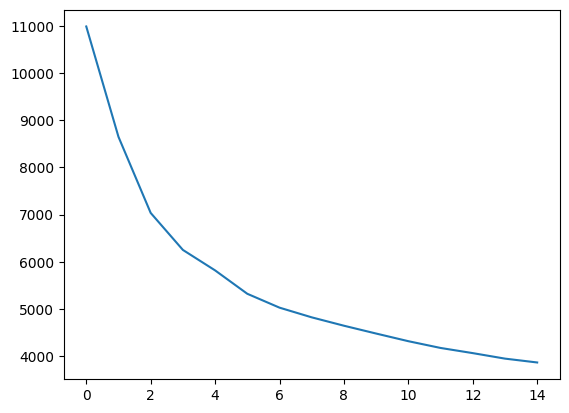

In [19]:
plt.plot(inertia)
plt.show()

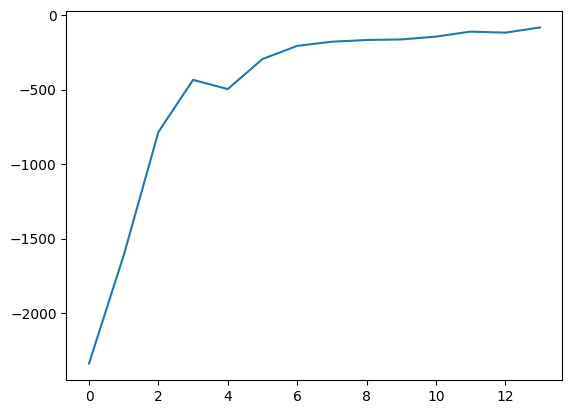

In [20]:
plt.plot(np.diff(inertia))
plt.show()

In [21]:
km = sklearn.cluster.KMeans(n_clusters=2, random_state=123)
km.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

In [22]:
#grupowanie punktów zbioru wejściowego
y_pred = km.fit_predict(X)
y_pred[:20]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int32)

In [23]:
#musimy znaleźć punkt odniesienia - interesuje nas zgodność między wyznaczonym podziałem a kolorem wina
y_test = wine_sample["color"].cat.codes.values
y_test[:20]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int8)

In [24]:
wine_sample["color"][:20]

4914    white
3480    white
4588    white
925       red
4701    white
2144    white
1436    white
2436    white
4457    white
1945    white
973       red
1671    white
2771    white
3214    white
1001      red
3966    white
3410    white
1091      red
3580    white
2857    white
Name: color, dtype: category
Categories (2, object): ['red', 'white']

In [25]:
#macierz pomyłek
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[  7, 244],
       [738,  11]])

In [26]:
#zgodność między dwoma podziałami zbioru na skupienia można zmierzyć za pomocą indeksu Fowlkesa-Mallowsa :)
def indeks_fm(Y1, Y2):
    assert len(Y1) == len(Y2)
    assert min(Y1.min(), Y2.min()) >= 0
    k = max(Y1.max(), Y2.max()) + 1
    n = len(Y1)
    
    C1 = [set() for i in range(k)] #k zbiorów
    C2 = [set() for i in range(k)] #k zbiorów
    for i in range(n):
        C1[ Y1[i] ].add(i) #dodaj i-tą obserwację
        C2[ Y2[i] ].add(i) # do Y2[i]-tego zbioru z C2
        
    M = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            M[i, j] = len(C1[i]&C2[j])
        
    return ((M**2).sum() - n)/(np.sqrt(((M.sum(axis=0)**2).sum() - n) * ((M.sum(axis=1)**2).sum() - n)))

In [27]:
#testowanie ideksu FM na równoważnych podziałach
indeks_fm(np.r_[0, 0, 0, 1, 1], np.r_[1, 1, 1, 0, 0])

1.0

In [28]:
#zgodność między podziałem generowanym przez algorytm k-średnich, a tym który wynika z koloru wina
indeks_fm(y_test, y_pred)
#indeks jest wysoki co oznacza, że zmienna color wyznacza naturalny podział zbioru win na dwie podgrupy

0.9715423415383736

In [29]:
#można oczywiście wykorzystać zaimplementowane metody
#indeks FM
from sklearn.metrics.cluster import fowlkes_mallows_score
#skorygowany indeks Randa
from sklearn.metrics.cluster import adjusted_rand_score 

In [30]:
fowlkes_mallows_score(y_test, y_pred)

0.9715423415383737

In [31]:
adjusted_rand_score(y_test, y_pred)

0.924773553475941

In [32]:
#odwzorowanie referencyjnych etykiet
kategoria1 = wine_sample["color"].cat.categories
kategoria2 = wine_sample["color"].cat.categories + "_clust"

In [33]:
kategoria1

Index(['red', 'white'], dtype='object')

In [34]:
kategoria2

Index(['red_clust', 'white_clust'], dtype='object')

In [35]:
if np.mean(y_test == y_pred) < np.mean(y_test != y_pred):
    kategoria2 = kategoria2[::-1]

In [36]:
kategoria1

Index(['red', 'white'], dtype='object')

In [37]:
kategoria2

Index(['white_clust', 'red_clust'], dtype='object')

In [38]:
#wyznaczanie środków skupień znalexionych przez algorytm k-średnich oraz tych generowanych przez zmienną kolor
srodki1 = pd.DataFrame(km.cluster_centers_.T, columns=kategoria2, index=X.columns)

srodki2 = X.groupby(wine_sample.color).mean().T

srodki12 = pd.concat([srodki1, srodki2], axis=1)
srodki12

,white_clust,red_clust,red,white
fixed.acidity,-0.314423,0.918610,0.906606,-0.303816
volatile.acidity,-0.378917,1.107032,1.052493,-0.352705
citric.acid,0.077990,-0.227854,-0.210899,0.070675
residual.sugar,0.192691,-0.562960,-0.575047,0.192706
chlorides,-0.302529,0.883858,0.883795,-0.296172
free.sulfur.dioxide,0.276200,-0.806938,-0.790664,0.264962
total.sulfur.dioxide,0.395585,-1.155730,-1.172959,0.393074
density,-0.268437,0.784259,0.774947,-0.259695
pH,-0.174208,0.508960,0.506645,-0.169783
sulphates,-0.291474,0.851560,0.829956,-0.278129


In [39]:
km.cluster_centers_.T

array([[-0.31442346,  0.91860973],
       [-0.37891712,  1.10703236],
       [ 0.0779904 , -0.2278543 ],
       [ 0.19269109, -0.56296023],
       [-0.30252867,  0.88385827],
       [ 0.27620036, -0.80693831],
       [ 0.39558539, -1.15572985],
       [-0.2684375 ,  0.78425857],
       [-0.1742078 ,  0.50896003],
       [-0.29147362,  0.8515602 ],
       [ 0.05877604, -0.17171823]])

In [40]:
srodki12 = srodki12[['white_clust', 'white', 'red_clust', 'red']]

In [41]:
srodki12

,white_clust,white,red_clust,red
fixed.acidity,-0.314423,-0.303816,0.918610,0.906606
volatile.acidity,-0.378917,-0.352705,1.107032,1.052493
citric.acid,0.077990,0.070675,-0.227854,-0.210899
residual.sugar,0.192691,0.192706,-0.562960,-0.575047
chlorides,-0.302529,-0.296172,0.883858,0.883795
free.sulfur.dioxide,0.276200,0.264962,-0.806938,-0.790664
total.sulfur.dioxide,0.395585,0.393074,-1.155730,-1.172959
density,-0.268437,-0.259695,0.784259,0.774947
pH,-0.174208,-0.169783,0.508960,0.506645
sulphates,-0.291474,-0.278129,0.851560,0.829956


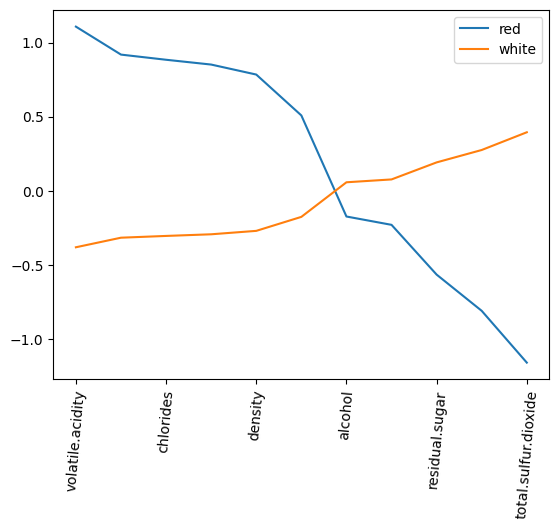

In [42]:
#wykres wsp środków skupień wyznaczonych metodą k-średnich
srodki12["red_clust"].sort_values(ascending=False).plot(label='red')
srodki12["white_clust"].sort_values(ascending=True).plot(label='white')
plt.legend()
plt.xticks(rotation=85)
plt.show()

In [43]:
#odległość między szacowanymi i referencyjnymi środkami jest niewielka
np.sqrt(np.sum((srodki12.white - srodki12.white_clust)**2))


0.03668829742931121

In [44]:
np.sqrt(np.sum((srodki12.red - srodki12.red_clust)**2))

0.07032659957869306

In [45]:
#analiza głównych składowych
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [46]:
#intersują nas dwie pierwsze składowe główne
#ponieważ chcemy zrzutować 11-wymiarową przestrzeń na dwuwymiarową
pd.DataFrame(pca.components_.T, index=X.columns)

,0,1
fixed.acidity,0.321532,0.261806
volatile.acidity,0.373051,0.021761
citric.acid,-0.080395,0.267931
residual.sugar,-0.274555,0.400290
chlorides,0.351446,0.231874
free.sulfur.dioxide,-0.407599,0.197794
total.sulfur.dioxide,-0.455350,0.203516
density,0.192922,0.543907
pH,0.167558,-0.169711
sulphates,0.335900,0.131044


In [47]:
pca.components_

array([[ 0.32153209,  0.37305075, -0.08039465, -0.27455507,  0.3514459 ,
        -0.40759915, -0.45535013,  0.19292159,  0.16755784,  0.33589981,
        -0.02209945],
       [ 0.26180573,  0.02176141,  0.26793146,  0.4002903 ,  0.23187428,
         0.19779365,  0.20351583,  0.54390719, -0.16971132,  0.13104422,
        -0.47206818]])

In [48]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [49]:
#x1 = 0.32153209*fixed.acidity + 0.37305075*volatile.acidity + ...
#x2 = 0.26180573*fixed.acidity + 0.02176141*volatile.acidity + ...

In [50]:
pca.explained_variance_ratio_


array([0.27288282, 0.22767173])

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27288282, 0.50055455])

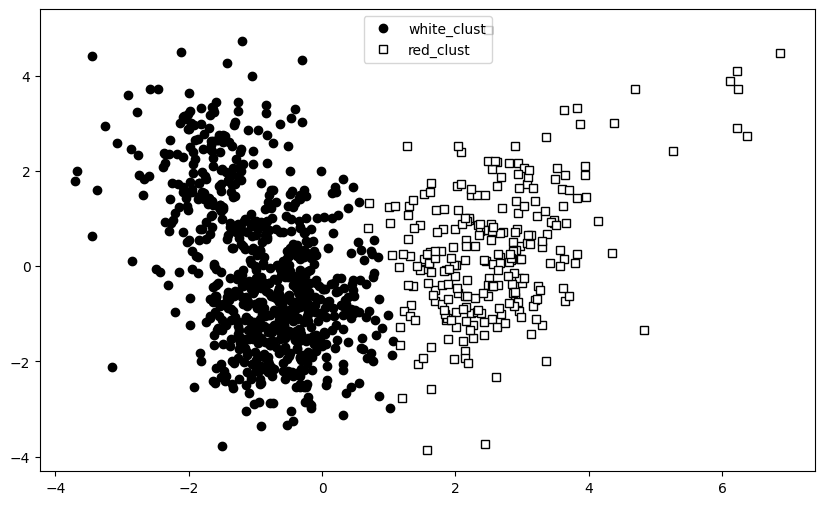

In [52]:
#wykres współrzędnych punktów z dwóch skupień wyznaczonych za pomocą algorytmu k-średnich - rzut zbioru danych na dwa kierunki główne
X2 = pca.transform(X) #wyznacz główne składowe
grp = (y_pred==0) #0 -> color

plt.figure(figsize=(10,6))
plt.plot(X2[ grp, 0], X2[ grp, 1], "ko", label=kategoria2[0])
plt.plot(X2[~grp, 0], X2[~grp, 1], "ws", label=kategoria2[1], markeredgecolor="k", markeredgewidth=1)
plt.legend(loc=9)
plt.show()

In [ ]:
#hierarchiczna analiza skupień
hw = sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

In [ ]:
#trenujemy model
y_pred2 = hw.fit(X).labels_

In [ ]:
y_pred2

In [ ]:
#macierz pomyłek
sklearn.metrics.confusion_matrix(y_test, y_pred2)

In [ ]:
#podsumowanie wyników dla dwóch metod klasteryzacji
pd.DataFrame({
    "k-means": fowlkes_mallows_score(y_test, y_pred),
    "ward": fowlkes_mallows_score(y_test, y_pred2)}, index=["Indeks FM"])

In [ ]:
#rysujemy dendrogram
import scipy.cluster.hierarchy
hw2 = scipy.cluster.hierarchy.ward(X)

plt.figure(figsize=(16,8))
den = scipy.cluster.hierarchy.dendrogram(hw2, no_labels=True)
plt.show()